In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
ds = pd.read_csv('C:/Users/vikas/Desktop/mljan19dwk/Datasets/mnist/train.csv')
ds = ds.values

In [32]:
print(ds.shape)
X = ds[:,1:]
Y = ds[:,0]

#Min Max Scaler
X = (X - X.min())/(X.max()-X.min())

(42000, 785)


In [33]:
from sklearn.model_selection import train_test_split


In [34]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.2)

In [35]:
print(X_train.shape , X_test.shape , Y_train.shape , Y_test.shape)

(33600, 784) (8400, 784) (33600,) (8400,)


In [36]:
class NeuralNetworks:
    def __init__(self , x , y):
        self.x = x
        self.y = y
        self.N = self.x.shape[0]
        self.INPUT_DIM = x.shape[1]
        self.OUTPUT_DIM = len(np.unique(y))
        self.H1_SIZE = 256
        self.H2_SIZE = 64
        self.losses = [] 
        
        # Initialize Weights and biases
        self.W1 = np.random.randn(self.INPUT_DIM , self.H1_SIZE)  # (784,256)
        self.b1 = np.zeros((1,self.H1_SIZE)) # (1,256)
        
        self.W2 = np.random.randn(self.H1_SIZE , self.H2_SIZE) # (256,64)
        self.b2 = np.zeros((1,self.H2_SIZE)) # (1,64)
        
        self.W3 = np.random.randn(self.H2_SIZE , self.OUTPUT_DIM) # (64,10)
        self.b3 = np.zeros((1,self.OUTPUT_DIM)) # (1,10)
        
    def forward(self , x):
        Z1 = x.dot(self.W1) + self.b1  # (N,256) = (N,784)(784,256) + (1,256)
        A1 = self.sigmoid(Z1) # (N,256)
        
        Z2 = A1.dot(self.W2) + self.b2 # (N,64) = (N,256)(256,64) + (1,64)
        A2 = self.sigmoid(Z2) # (N,64)
        
        Z3 = A2.dot(self.W3) + self.b3 # (N,10) = (N,64)(64,10) + (1,10)
        yhat = self.softmax(Z3) # (N,10)
        
        self.activation = [A1,A2,yhat]
        
        return yhat
    
    def backward(self , x, y ,yhat ,learning_rate=0.01): # we will pass y as One_hot_vector of Dim (N,10)
        
        A1 , A2 , yhat = self.activation
        # Compute Gradients
        delta3 = (yhat-y) # (N,10) 
        dldw3 = A2.T.dot(delta3) # (64,10)
        dldb3 = delta3.sum(axis=0 , keepdims=True)
        
        delta2 = delta3.dot(self.W3.T) * (A2*(1-A2)) # (N,64) 
        dldw2 = A1.T.dot(delta2) # (256,64)
        dldb2 = delta2.sum(axis=0 , keepdims=True)
        
        delta1 = delta2.dot(self.W2.T)* (A1 * (1-A1)) # (N,256) 
        dldw1 =  x.T.dot(delta1) # (784,256)
        dldb1 = delta1.sum(axis=0 , keepdims=True)
        
        # update gradients and biases
        self.W1 -= learning_rate*dldw1
        self.b1 -= learning_rate*dldb1
        
        self.W2 -= learning_rate*dldw2
        self.b2 -= learning_rate*dldb2
        
        self.W3 -= learning_rate*dldw3
        self.b3 -= learning_rate*dldb3
    
    def predict(self , test):
        yhat = self.forward(test)
        preds = yhat.argmax(axis = 1)
        return preds
    
    def accuracy(self , labels , predictions ):
        return (labels==predictions).sum()/labels.shape[0] #.mean()
    
    def compute_loss(self , y , yhat ): # y is one_hot_vector
        return -np.sum(y*np.log(yhat))
    
    def  sigmoid(self , z):
        return 1/(1+np.exp(-z))
    
    def sigmoid_derivative(self , z):
        y = self.sigmoid(z)
        return y * (1-y)
    
    def softmax(self , z):
        return np.exp(z)/(np.exp(z)).sum(axis = 1 , keepdims = True)
    
    def get_one_hot_vector(self , y):
        n_classes = len(np.unique(y))
        one_hot_vector = np.zeros((y.shape[0] , n_classes))
        for i , label in enumerate(y):
            one_hot_vector[i,label]=1
        
        return one_hot_vector
    
    def train(self , learning_rate = 0.01 , epochs=10 , batch_size=128):
        y_one_hot_vector = self.get_one_hot_vector(self.y)
        for e in range(epochs):
            size =0
            while size+batch_size<self.N:
                x_batch = self.x[size : size+batch_size]
                y_batch = self.y[size : size+batch_size]
                size+=batch_size
                
                y_batch_hot = self.get_one_hot_vector(y_batch)
                yhat_batch = self.forward(x_batch)
                self.backward(x_batch , y_batch_hot , yhat_batch ,learning_rate)
            yhat = self.forward(self.x)
            self.losses.append(self.compute_loss(y_one_hot_vector,yhat))
            print("loss at [{}] epoch {}".format(e,self.losses[-1]))
    

In [37]:
nn = NeuralNetworks(X_train , Y_train)

In [38]:
nn.INPUT_DIM, nn.H1_SIZE, nn.H2_SIZE, nn.OUTPUT_DIM

(784, 256, 64, 10)

In [39]:
print("First Loss: ", nn.compute_loss(nn.get_one_hot_vector(nn.y), nn.forward(nn.x)))

First Loss:  349540.5397953635


In [40]:
nn.train(learning_rate=0.01, epochs=20, batch_size=128)

loss at [0] epoch 17003.687744282135
loss at [1] epoch 12052.465062872063
loss at [2] epoch 10153.43814980739
loss at [3] epoch 8629.978577303384
loss at [4] epoch 7420.082685166719
loss at [5] epoch 6561.675218439036
loss at [6] epoch 5870.067902821412
loss at [7] epoch 5277.797843247812
loss at [8] epoch 4735.48923792604
loss at [9] epoch 4281.237708684849
loss at [10] epoch 3904.022286196491
loss at [11] epoch 3579.1148687938326
loss at [12] epoch 3288.070052159465
loss at [13] epoch 3021.864730672834
loss at [14] epoch 2780.870327067851
loss at [15] epoch 2554.1289818848436
loss at [16] epoch 2337.5965601107405
loss at [17] epoch 2141.426336865478
loss at [18] epoch 1973.1799832038573
loss at [19] epoch 1830.0977636207365


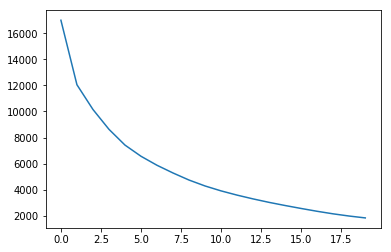

In [42]:
plt.figure()
plt.plot(nn.losses)
plt.show()

In [43]:
preds = nn.predict(X_test)
print("Testing Acc: ", nn.accuracy(preds, Y_test))

train_preds = nn.predict(X_train)
print("Training Acc:", nn.accuracy(train_preds, Y_train))

Testing Acc:  0.9310714285714285
Training Acc: 0.9858928571428571
